In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('../../../Data & Script/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

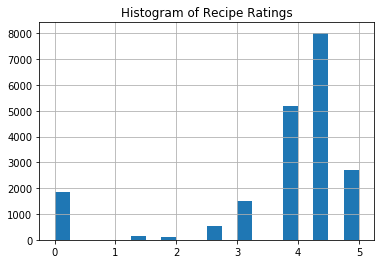

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count > 0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [7]:
# # takes long time
# from sklearn.svm import SVR
# svr = SVR()
# X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
# Y = raw_data.rating
# svr.fit(X,Y)

# load saved model
svr = pickle.load(open('svr1.sav', 'rb'))
svr

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

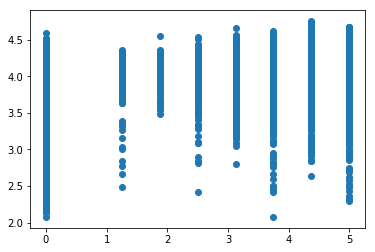

In [8]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [9]:
svr.score(X, Y)

0.03856570651298896

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, n_jobs=-1, cv=5)

array([0.01818511, 0.026411  , 0.03037705, 0.01957949, 0.02451197])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.

#### Attempt

* Recipe: title, rating (2 features)
* ingredients: calories, protein, fat, sodium (4 features)
* key_terms: (674 features)

Only key_terms are used as predictors. Rating is the target variable

Read this 
http://pbpython.com/categorical-encoding.html

### Multiclass Classification
#### Value Counts

In [72]:
raw_data.rating.value_counts().sort_values()

1.875     124
1.250     164
2.500     532
3.125    1489
0.000    1836
5.000    2719
3.750    5169
4.375    8019
Name: rating, dtype: int64

In [12]:
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
y = raw_data.rating
# convert y to categorical
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)

In [74]:
# after encoding
pd.Series(y).value_counts().sort_values()

2     124
1     164
3     532
4    1489
0    1836
7    2719
5    5169
6    8019
dtype: int64

The encoding somewhat arbitrary, It is ok for now. I can manually map them when needed.

#### Recursive Feature Elimination using Random Forest

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Optimal number of features : 505
Index(['22-minute meals', '3-ingredient recipes', 'advance prep required',
       'alcoholic', 'almond', 'amaretto', 'anchovy', 'anise', 'anniversary',
       'aperitif',
       ...
       'wine', 'winter', 'wok', 'yellow squash', 'yogurt', 'zucchini',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=505)
0.9855376022341911


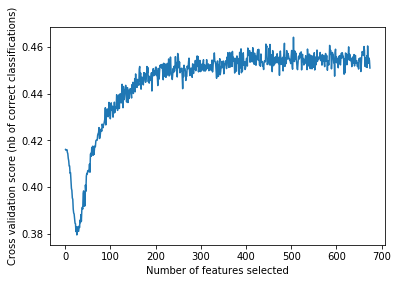

In [13]:
# Select Features using Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
# The "accuracy" scoring is proportional to the number of correct classifications
# takes 30 minutes, better to load previously saved model
selector_rf = pickle.load(open('selector_rf.sav', 'rb'))
#selector_rf = RFECV(RandomForestClassifier(), scoring='accuracy', n_jobs=-1)
#import time
#start_time = time.time()
#selector_rf.fit(X, y)
print("Optimal number of features : %d" % selector_rf.n_features_)
print(X.columns[selector_rf.get_support(indices=True)])
print(selector_rf.score(X,y))
#print("--- %s seconds ---" % (time.time() - start_time))
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector_rf.grid_scores_) + 1), selector_rf.grid_scores_)
plt.show()

In [136]:
#trying to rank the features, but not working because the estimetor is not fitted using fit()
#selector_rf.estimator.feature_importances_

selector_rf.grid_scores_

array([0.41611881, 0.41576964, 0.41581949, 0.41601891, 0.41492219,
       0.41427369, 0.41232852, 0.41128095, 0.40903673, 0.40903746,
       0.40594559, 0.40614499, 0.40295198, 0.39941216, 0.39851385,
       0.39532293, 0.39472414, 0.39048716, 0.38884083, 0.38839143,
       0.38659662, 0.38445207, 0.38420158, 0.38086015, 0.38295477,
       0.37941576, 0.3828562 , 0.38235661, 0.38096128, 0.38100893,
       0.38320485, 0.38260657, 0.38574761, 0.38470048, 0.38814199,
       0.38529846, 0.39018762, 0.39128159, 0.39048442, 0.39716594,
       0.39831388, 0.39178146, 0.39741609, 0.39188293, 0.40085828,
       0.39816489, 0.40464729, 0.40579639, 0.40559723, 0.40684303,
       0.40709287, 0.40659418, 0.40744082, 0.40983461, 0.4063443 ,
       0.41402343, 0.41447435, 0.4131778 , 0.4169672 , 0.41392493,
       0.41751518, 0.41362529, 0.41736594, 0.41397408, 0.41656834,
       0.4175642 , 0.41731534, 0.41976019, 0.42010947, 0.42001058,
       0.42010877, 0.4222018 , 0.42290143, 0.42334927, 0.42549

#### PCA feature importance

In [56]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=30)
X_t = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)
# take the first principal component and find the loading scores(163 of them)
loading_scores = pd.Series(sklearn_pca.components_[0], index=X.columns)

sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

sorted_loading_scores.head(30)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.12310325 0.04414084 0.03883227 0.02648318 0.02280018 0.01867339
 0.01624925 0.01510961 0.0143033  0.01340297 0.01245192 0.01186382
 0.01149502 0.01031826 0.01002525 0.00932857 0.00909545 0.0088844
 0.00867578 0.0084007  0.00821706 0.00808013 0.00777638 0.00769084
 0.00756433 0.00723954 0.00712354 0.00702391 0.00682328 0.00670951]


peanut free          0.405768
soy free             0.400234
kosher               0.353162
pescatarian          0.351861
tree nut free        0.349370
vegetarian           0.285156
wheat/gluten-free    0.256291
no sugar added       0.171118
dairy free           0.168436
side                 0.136636
kidney friendly      0.127412
sugar conscious      0.118664
dessert              0.095250
vegan                0.089355
dinner               0.063663
paleo                0.050199
bake                 0.043460
appetizer            0.042040
healthy              0.040171
lunch                0.038812
drink                0.036431
bon appétit          0.035411
gourmet              0.030898
alcoholic            0.030661
egg                  0.028699
kid-friendly         0.027143
cocktail party       0.026844
brunch               0.026526
fruit                0.026131
fat free             0.025716
dtype: float64

In [213]:
# the cofficents don't add up to 1, but the magnitude of an eigen vector is 1.0
print(np.linalg.norm(sklearn_pca.components_[0]))
print(np.linalg.norm(sklearn_pca.components_[1]))
print(np.linalg.norm(sklearn_pca.components_[2]))
print(np.linalg.norm(sklearn_pca.components_[3]))

1.0
0.9999999999999996
0.9999999999999996
0.9999999999999998


In [15]:
import time
start_time = time.time()
# train SVC model(takes time)
from sklearn.svm import SVC
#modelA =  SVC(tol=0.01, max_iter=-1)
# Use PCA features
#modelA.fit(X_t,y)
#print("--- %s seconds ---" % (time.time() - start_time))

modelA = pickle.load(open('modelA.sav', 'rb'))

print("--- %s seconds ---" % (time.time() - start_time))

--- 55.87784266471863 seconds ---


In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(modelA, X_t, y, n_jobs=-1, cv=5)

array([0.41265886, 0.41600199, 0.4176016 , 0.41585639, 0.41747815])

In [17]:
# use original features
X = raw_data[sorted_loading_scores.index]
import time
start_time = time.time()
# train SVC model(takes time)
from sklearn.svm import SVC
#modelB =  SVC(tol=0.01, max_iter=-1)
#modelB.fit(X,y)
#print("--- %s seconds ---" % (time.time() - start_time))

modelB = pickle.load(open("modelB.sav", 'wb'))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.01, verbose=False)

In [18]:
cross_val_score(modelB, X, y, n_jobs=-1, cv=5)

array([0.40991777, 0.41500499, 0.41859885, 0.41411119, 0.41548065])

#### Feature Variance

In [158]:
from sklearn.feature_selection import VarianceThreshold
# zero or one in 80% of the samples
# one class cannot be more than 91% of the data
var_selector = VarianceThreshold(.9115 * (1 - .9115))
X_t2 = var_selector.fit_transform(X)
print(X.columns[var_selector.get_support(indices=True)])

Index(['peanut free', 'soy free', 'kosher', 'pescatarian', 'tree nut free',
       'vegetarian', 'wheat/gluten-free', 'no sugar added', 'dairy free',
       'side', 'kidney friendly', 'sugar conscious', 'dessert', 'vegan',
       'dinner', 'bake', 'healthy', 'bon appétit', 'gourmet', 'kid-friendly',
       'fruit', 'milk/cream', 'tomato', 'quick & easy', 'fall', 'vegetable',
       'sauté', 'onion', 'winter', 'summer'],
      dtype='object')


In [160]:
# compare it with PCA
pca_and_variance_th = pd.DataFrame({"PCA_Importance": sorted_loading_scores.head(30).index, "Variance_Threshold":X.columns[var_selector.get_support(indices=True)]})
print(pca_and_variance_th)

# how much intersection
print(len(set(set(pca_and_variance_th.PCA_Importance).intersection(set(pca_and_variance_th.Variance_Threshold)))))

       PCA_Importance Variance_Threshold
0         peanut free        peanut free
1            soy free           soy free
2              kosher             kosher
3         pescatarian        pescatarian
4       tree nut free      tree nut free
5          vegetarian         vegetarian
6   wheat/gluten-free  wheat/gluten-free
7      no sugar added     no sugar added
8          dairy free         dairy free
9                side               side
10    kidney friendly    kidney friendly
11    sugar conscious    sugar conscious
12            dessert            dessert
13              vegan              vegan
14             dinner             dinner
15              paleo               bake
16               bake            healthy
17          appetizer        bon appétit
18            healthy            gourmet
19              lunch       kid-friendly
20              drink              fruit
21        bon appétit         milk/cream
22            gourmet             tomato
23          alco

In [66]:
import time
start_time = time.time()
# train SVC model(takes time)
from sklearn.svm import SVC
#modelC =  SVC(tol=0.01, max_iter=-1)
#modelC.fit(X_t2,y)
modelC = pickle.load(open('modelC.sav', 'rb'))
#print("--- %s seconds ---" % (time.time() - start_time))

--- 45.237967014312744 seconds ---


In [67]:
modelC.score(X_t2,y)

0.4139736684619988

In [19]:
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import RFECV 
# selector_three = RFECV(estimator= SVC(tol=0.01), step=1, cv=StratifiedKFold(10),
#               n_jobs=-1, scoring='accuracy')
# selector_three.fit(X, y)
# print(X.columns[selector_three.get_support(indices=True)])

# print("Optimal number of features : %d" % selector_three.n_features_)
# print(X.columns[selector_three.get_support(indices=True)])
# print("score: ", selector_three.score(X, y))
# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(selector_three.grid_scores_) + 1), selector_three.grid_scores_)
# plt.show()

### Binary Classfier

In [126]:
y = raw_data.rating
# split at the median
print(y.median())
print("Nice class balance: \n", np.bincount(np.where(y < 4.375, 0, 1)))
y_binary = np.where(y < 4.375, 0, 1)

4.375
Nice class balance: 
 [ 9314 10738]


In [174]:
print("majority classifier output: ", 10738 / (10738 + 9314))

majority classifier output:  0.5355076800319171


In [127]:
## try PCA important features
# use original features
X = raw_data[sorted_loading_scores.index]
#import time
#start_time = time.time()
# train SVC model(takes time)
#from sklearn.svm import SVC
#modelD =  SVC(tol=0.01, max_iter=-1)
#modelD.fit(X, y_binary)
modelD = pickle.load(open('modelD.sav', 'rb'))
#print("--- %s seconds ---" % (time.time() - start_time))

--- 310.5093038082123 seconds ---


In [128]:
cross_val_score(modelD, X, y_binary, n_jobs=-1, cv=5)

array([0.56793817, 0.57466966, 0.57292446, 0.56882793, 0.57944625])

In [129]:
## try PCA components

#import time
#start_time = time.time()
# train SVC model(takes time)
from sklearn.svm import SVC
modelE = pickle.load(open('modelE.sav', 'rb'))

#modelE =  SVC(tol=0.01, max_iter=-1)
#modelE.fit(X_t, y_binary)
#print("--- %s seconds ---" % (time.time() - start_time))

--- 30.04171085357666 seconds ---


In [130]:
cross_val_score(modelE, X_t, y_binary, n_jobs=-1, cv=5)

array([0.58015457, 0.57766143, 0.57242583, 0.58703242, 0.58268895])

Optimal number of features : 583
Index(['peanut free', 'soy free', 'kosher', 'pescatarian', 'tree nut free',
       'vegetarian', 'wheat/gluten-free', 'no sugar added', 'dairy free',
       'side',
       ...
       'digestif', 'sandwich theory', 'tennessee', 'taco', 'italy',
       '22-minute meals', 'granola', 'illinois', 'calvados', 'france'],
      dtype='object', length=583)
0.985836824256932


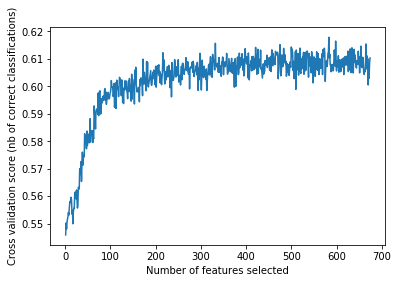

In [133]:
# Select Features using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
# The "accuracy" scoring is proportional to the number of correct classifications
# takes 30 minutes, better to load previously saved model
selector_rf2 = pickle.load(open('selector_rf2.sav', 'rb'))
#selector_rf2 = RFECV(RandomForestClassifier(), scoring='accuracy', n_jobs=-1)
#import time
#start_time = time.time()
#selector_rf2.fit(X, y_binary)
print("Optimal number of features : %d" % selector_rf2.n_features_)
print(X.columns[selector_rf2.get_support(indices=True)])
print(selector_rf2.score(X, y_binary))
#print("--- %s seconds ---" % (time.time() - start_time))
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector_rf2.grid_scores_) + 1), selector_rf2.grid_scores_)
plt.show()

#### Recursive Feature Elimination(with Max features)

In [176]:
import time
#start_time = time.time()
from sklearn.feature_selection import RFE
# takes 10 minutes
#selector_rf3 = RFE(RandomForestClassifier(), n_features_to_select=30, step=1)
#selector_rf3 = selector_rf3.fit(X, y_binary)
selector_rf3 = pickle.load(open("selector_rf3.sav","rb"))
#print("--- %s seconds ---" % (time.time() - start_time))

In [177]:
print(X.columns[selector_rf3.get_support(indices=True)])

Index(['vegetarian', 'wheat/gluten-free', 'no sugar added', 'dairy free',
       'side', 'kidney friendly', 'sugar conscious', 'healthy', 'bon appétit',
       'egg', 'kid-friendly', 'chicken', 'milk/cream', 'salad', 'soup/stew',
       'tomato', 'quick & easy', 'garlic', 'dairy', 'sauté', 'potato', 'onion',
       'spring', 'herb', 'ginger', 'winter', 'food processor', 'lemon',
       'summer', 'chill'],
      dtype='object')


In [162]:
# compare with the other feature selection results

allthree = pd.DataFrame({"PCA_Importance": sorted_loading_scores.head(30).index, 
                         "Variance_Threshold":X.columns[var_selector.get_support(indices=True)],
                         "Random Forest": X.columns[selector_rf3.get_support(indices=True)]
                        })
print(allthree)

       PCA_Importance Variance_Threshold      Random Forest
0         peanut free        peanut free         vegetarian
1            soy free           soy free  wheat/gluten-free
2              kosher             kosher     no sugar added
3         pescatarian        pescatarian         dairy free
4       tree nut free      tree nut free               side
5          vegetarian         vegetarian    kidney friendly
6   wheat/gluten-free  wheat/gluten-free    sugar conscious
7      no sugar added     no sugar added            healthy
8          dairy free         dairy free        bon appétit
9                side               side                egg
10    kidney friendly    kidney friendly       kid-friendly
11    sugar conscious    sugar conscious            chicken
12            dessert            dessert         milk/cream
13              vegan              vegan              salad
14             dinner             dinner          soup/stew
15              paleo               bake

In [166]:
# transform X
Xt_rf = selector_rf3.transform(X)
Xt_rf.shape

(20052, 30)

In [169]:
start_time = time.time()
#modelF =  SVC(tol=0.01, max_iter=-1)
#modelF.fit(X_t2,y_binary)
modelF = pickle.load(open('modelF.sav', 'rb'))
print("--- %s seconds ---" % (time.time() - start_time))

--- 103.1919629573822 seconds ---


In [171]:
cross_val_score(modelF, Xt_rf, y_binary, n_jobs=-1, cv=5)

array([0.55397656, 0.5477437 , 0.54475193, 0.55361596, 0.54527314])

In [170]:
## Save the models
import pickle
pickle.dump(svr, open('svr1.sav', 'wb'))
pickle.dump(selector_rf, open('selector_rf.sav', 'wb'))
pickle.dump(modelA, open('modelA.sav', 'wb'))
pickle.dump(modelB, open('modelB.sav', 'wb'))
pickle.dump(modelC, open('modelC.sav', 'wb'))
pickle.dump(selector_rf2, open('selector_rf2.sav', 'wb'))
pickle.dump(modelD, open('modelD.sav', 'wb'))
pickle.dump(modelE, open('modelE.sav', 'wb'))
pickle.dump(selector_rf3, open('selector_rf3.sav', 'wb'))
pickle.dump(modelF, open('modelF.sav', 'wb'))

#### Reflection

Support Vector Machines can be used for Regression and Classification. For Classification we want to maximize the margin which is the distance from the classifier hyperplane(line for 2D data) to the support vectors(nereast vector to the boundary). If there are misclassified data points we want to minimize their distance to the boundary. For Regression, the margin is the difference between actual and predicted values. The advantage of SVR over other techniques like OLS is, we can specify the size of the margin and the penality for being outside the margin for training. 

There are many ways to select features. I run PCA and selected 30 features in two ways: the principal components(modelA), important features(modelB). Then I selected 30 features using VarianceThreshold(modelC). All performed similarly(around 0.4)
In this notebook, I tried to do multi-class SVC. 

For binary target variable, using the PCA fetures, the accuracy score is around 0.575. It is a little higher than the majority class(
I experimeted RFECV with randomforest for multiclass (rf1) and for binary ouput(rf2). Both yielded large number of features(>500). I couldn't not find a way to rank them. 

I found using RFE it is possible to get feature_importances. RFE with SVC is not possible because SVC don't have feature_importances or coef_ attributes. I used RFE with RandomForest and its accuracy is only 0.53.